<a href="https://colab.research.google.com/github/analouvain/BI-MASTER/blob/main/lui_trabalho_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BI MASTER - Trabalho de LUI**

**Aluna**: Ana Paula Costa Assumpção

**Matrícula**: 221100813

**email**: analouvain@hotmail.com

**Disciplina**: LUI - Localização e Uso da Informação

**Professor**: Felipe Borges

**Turma**: 2022.1


# **Objetivo do trabalho**
O Spotify mantém playlists atualizadas diariamente com as 50 músicas mais tocadas de alguns países. Nesse trabalho o objetivo é acessar a API do Spotify para montar um dataset com as músicas dessas playlists para uma posterior análise do perfil musical de cada região.

**Observação**: Como as playlists analisadas nesse trabalho são atualizadas diariamente pelo Spotify, os resultados aqui apresentados podem mudar a cada vez que o código for executado.

In [ ]:
#Importação das Bibliotecas
import requests
import pandas as pd
import json
import re

# **Preparação para uso da API do Spotify**

1) Criar uma conta no Spotify - Conta criada: AnaPaulaBiMaster

2) Efetuar login no Spotify developer dashboard link: https://developer.spotify.com/dashboard

3) Confirme email de cadastro / verificação de email.

4) Crie uma app no Spotify developer dashboard.

5) Após a criação da app, pegar as credenciais de acesso clicando em Settings.


> Client ID : 3032d175b21a414c9a9e4fff967f166f


> Client secret: d7be1ad6cd034fe097e2bf325410df9d












In [ ]:
client_id = '3032d175b21a414c9a9e4fff967f166f'
client_secret = 'd7be1ad6cd034fe097e2bf325410df9d'

In [ ]:
auth_url = 'https://accounts.spotify.com/api/token'

auth_data = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
}

Solicitando um token de acesso.

O token de acesso é válido por 1 hora.


In [ ]:
auth_response = requests.post(auth_url, data=auth_data)

if auth_response.status_code == 200:
    access_token = auth_response.json()['access_token']
    print("Token de acesso obtido com sucesso")
else:
    print("Erro ao obter token de acesso")
    exit()

Token de acesso obtido com sucesso


In [ ]:
auth_response.json()

{'access_token': 'BQCzA-FnlYRhfQ1WeqwGYvsvIxayogs-5v0yHvJOpzySDJYsSYJEe37xS8veRImM0WGG3Zo4Pj6gzHFBg8Fieh5bbZYBJDjfe5fj2apYa7SeCMmgmi0',
 'token_type': 'Bearer',
 'expires_in': 3600}

`base_url` é a URL base da API do Spotify. Ela será utilizada mais a frente concatenado os Endpoints desejados para cada solicitação.

In [ ]:
base_url = 'https://api.spotify.com/v1/'
headers = {
    'Authorization': 'Bearer {}'.format(access_token)
}

O Spotify mantém playlists atualizadas diariamente com as 50 músicas mais tocadas de alguns países

Nesse trabalho o intiuito será montar um dataset com as músicas das playlists das 50 músicas mais tocadas diariamente desses países para uma possível análise do perfil musical de cada região.


# **O Dataset**

O data set criado terá os seguintes atributos:

**track_id** - id da música no spotify

**track_name** - nome da música

**album_name** - nome do álbum que a música se encontra

**release_date** - data de lançamento do álbum

**artist** - nome do artista ou banda que canta a música (vários artistas podem ser citados na performance de uma música, porém será considerado o primeiro artista a ser mencionado no retorno da API)

**playlist_id** - id da playlist que a música se encontra. Uma música pode estar listada mais de uma vez no dataset, pertencendo a mais de uma playlist.

**playlist_name** - nome da playlist que a música se encontra

**playlist_description** - descrição da playlist

**region** - região da playlist. pode ser um país ou global, que significa que a playlist contém as 50 músicas mais tocadas no mundo no dia.

**duration_ms** - duração da música em milisegundos

**popularity** - A popularidade da música. O valor estará entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo do Spotify e baseia-se, em grande parte, no número total de reproduções que a faixa teve e no quão recentes são essas reproduções.
De modo geral, as músicas que são muito tocadas recentemente terão uma popularidade maior do que as músicas que eram muito tocadas no passado.

**acousticness** - (acústica): Uma medida de 0 a 1 que indica a probabilidade de a faixa ser acústica. Um valor próximo de 1 sugere uma alta probabilidade de a faixa ser acústica.

**danceability** - (dançabilidade): Uma medida de 0 a 1 que indica quão adequada a música é para dançar, com base em elementos musicais como ritmo, estabilidade do ritmo e regularidade geral. Quanto mais próximo de 1, mais dançante é a música.

**energy** - (energia): Uma medida de 0 a 1 que representa a intensidade e atividade percebida na música. Músicas com alta energia costumam ser rápidas, ruidosas e barulhentas.

**instrumentalness** - (instrumental):Uma medida de 0 a 1 que indica a probabilidade de a faixa não conter vocais. Um valor próximo de 1 sugere uma alta probabilidade de a faixa ser instrumental.

**liveness** -  (ao vivo): Uma medida de 0 a 1 que indica a probabilidade de a música ter sido gravada ao vivo. Quanto mais próximo de 1, mais provável que a música seja ao vivo.

**loudness** -  (volume): A intensidade de volume média da faixa em decibéis (dB). Valores típicos variam de -60 a 0 dB.

**speechiness** - (fala):Uma medida de 0 a 1 que indica a presença de palavras faladas na música em relação a música cantada ou instrumental. Valores mais altos indicam mais palavras faladas.

**valence** -  (valência): Uma medida de 0 a 1 que indica a positividade da música. Músicas mais alegres têm valores mais altos, enquanto músicas mais tristes têm valores mais baixos.

**tempo** -  (ritmo): O ritmo estimado em batidas por minuto (BPM). É uma estimativa aproximada do andamento da música.

In [ ]:
df_top50 = pd.DataFrame(columns=['track_id', 'track_name', 'album_name', 'release_date', 'artist', 'playlist_id', 'playlist_name', 'playlist_description','region', 'duration_ms', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo'])

# **Funções Auxiliares**



In [ ]:
def getAudioFeatures(base_url, headers, tracks):
  """
  Acessa a API do Spotify para obter as audio features para cada track
    da lista de tracks passada como parâmetro.

  Parâmetros:
  base_url (string): URL base de acesso a API do Spotify
  headers (dictionary): Dicionário no formato Header de uma requisição
    de request com o controle de acesso da API do Spotify
  tracks (list): Lista de dicionários no formato track do Spotify

  Retorno:
  Dicionário contendo as audio features das tracks, onde a chave (nome do campo)
   é o id da track e o valor é um dicionário no formato da audio feature do Spotify
  """

  audio_features_dic = {}
  track_list = ""

  #Percorre a lista de tracks para formar uma string com os ids das tracks separados por vírgula
  for item in tracks:
    track       = item['track']
    track_id    = track['id']
    track_list += track_id + ','

  # Remove a vírgula extra no final da string
  track_list = track_list[:-1]

  #Preparando requisiçao para a API para pegar atributos (features) da lista de músicas (tracks)
  params                          = {'ids': track_list}
  request_audio_features_endpoint = "audio-features"
  request_audio_features_url      = ''.join([base_url, request_audio_features_endpoint])

  #Enviando a requisição para a API
  response_audio_features      = requests.get(request_audio_features_url,headers=headers, params=params)
  response_audio_features_json = json.loads(response_audio_features.text)

  #Lista de atributos de audio obtida
  audio_features_list = response_audio_features_json['audio_features']

  #Criando um dicionario com a lista de atributos de audio onde a chave de cada item é o id da track
  for item in audio_features_list:
    audio_features_dic[item['id']] = item

  return audio_features_dic

In [ ]:
def getPlaylistTracks(base_url, headers, playlist_id, region=None):
  """
  Acessa a API do Spotify para obter as tracks de uma determinada playlist
  Parâmetros:
  base_url (string): URL base de acesso a API do Spotify
  headers (dictionary): Dicionário no formato Header de uma requisição
    de request com o controle de acesso da API do Spotify
  playlist_id (string): id da playlist
  region (string): região a ser atribuída a playlist.

  Retorno:
  Lista de dicionarios no formato da linha do dataset que irá armazenar as
   informações das tracks
  """
  track_list = []

  request_endpoint = f"playlists/{playlist_id}"
  request_URL = ''.join([base_url, request_endpoint])

  response = requests.get(request_URL, headers=headers)
  playlist = json.loads(response.text)

  playlist_id           = playlist['id']
  playlist_name         = playlist['name']
  playlist_description  = playlist['description']

  tracks = playlist['tracks']['items']

  audio_features_dic = getAudioFeatures(base_url=base_url, headers=headers, tracks=tracks)

  for item in tracks:
    track       = item['track']
    track_id    = track['id']
    track_name  = track['name']
    popularity  = track['popularity']
    duration_ms = track['duration_ms']
    artist_name = track['artists'][0]['name']
    artist_id   = track['artists'][0]['id']
    album       = track['album']

    album_name   = album['name']
    release_date = album['release_date']

    acousticness     = audio_features_dic[track_id]['acousticness']
    danceability     = audio_features_dic[track_id]['danceability']
    energy           = audio_features_dic[track_id]['energy']
    instrumentalness = audio_features_dic[track_id]['instrumentalness']
    liveness         = audio_features_dic[track_id]['liveness']
    loudness         = audio_features_dic[track_id]['loudness']
    speechiness      = audio_features_dic[track_id]['speechiness']
    valence          = audio_features_dic[track_id]['valence']
    tempo            = audio_features_dic[track_id]['tempo']


    track_row =  {
      'track_id': track_id,
      'track_name': track_name,
      'album_name': album_name,
      'release_date': release_date,
      'artist': artist_name,
      'playlist_id': playlist_id,
      'playlist_name': playlist_name,
      'playlist_description': playlist_description,
      'region': region,
      'duration_ms': duration_ms,
      'popularity': popularity,
      'acousticness': acousticness,
      'danceability': danceability,
      'energy': energy,
      'instrumentalness': instrumentalness,
      'liveness': liveness,
      'loudness': loudness,
      'speechiness': speechiness,
      'valence': valence,
      'tempo': tempo
    }

    track_list.append(track_row)

  return track_list

# **Obtendo as Playlists e respectivas músicas que serão analisadas**

Será realizado um acesso a API do Spotify para recuperar as playslist entituladas Top 50 do próprio Spotify.

Essas playlists são mantidas e atualizadas diariamente pelo Spotify e contém as 50 músicas mais reproduzidas por dia e por cada região (Global - do mundo inteiro/ País - de um determinado país)



In [ ]:
df_top50.shape

(0, 20)

In [ ]:
search_top50_endpoint = "search"
search_top50_url      = ''.join([base_url,search_top50_endpoint])

search_top50_params = {'q' :'Top 50',
                       'type': 'playlist',
                       'market': 'BR'}
#Acessando a API do Spotify para buscar as playlists que contém o prefixo "Top 50"
response = requests.get(search_top50_url,headers=headers, params=search_top50_params)

search_reasult = json.loads(response.text)

#Lista das playlists que atenderam o critério de busca
top50_playlists = search_reasult['playlists']['items']

# Percorre a lista das playlists para recuperar as informações de tracks
for playlist in top50_playlists:

  playlist_id           = playlist['id']
  playlist_name         = playlist['name']
  playlist_description  = playlist['description']

  owner         = playlist['owner']
  owner_id      = owner['id']

  #Vamos pegar somente as playlists do Spotify entituladas como Top 50
  padrao_top50 = r"^Top 50 - "
  if re.match(padrao_top50, playlist_name) and owner_id == 'spotify':
    #As playlists Top 50 do Spotify tem como padrão de nome "Top 50 - " seguido
    #do nome do país ou Global, caso seja do mundo.
    #Iremos pegar a parte final do nome da playlist para utilizar como região
    padrao_regiao = r'Top 50 - (.+)'
    resultado_regiao = re.search(padrao_regiao, playlist_name)
    region = resultado_regiao.group(1)

    #Acessando a API através da função getPlaylistTracks para obter a lista das tracks que compoem a playlist no formato do dataset
    playlist_tracks = getPlaylistTracks(base_url=base_url, headers=headers, playlist_id=playlist_id, region=region)
    df_playlist = pd.DataFrame(playlist_tracks)
    print(f"Playlist: {playlist_name}")
    print(df_playlist.shape)

    #concatena o dataset da playlist atual com o dataset que contém todas as playlists Top 50
    df_top50 = pd.concat([df_top50, df_playlist], ignore_index=True)


Playlist: Top 50 - Brazil
(50, 20)
Playlist: Top 50 - Global
(50, 20)
Playlist: Top 50 - USA
(50, 20)
Playlist: Top 50 - Portugal
(50, 20)
Playlist: Top 50 - South Korea
(50, 20)
Playlist: Top 50 - Argentina
(50, 20)
Playlist: Top 50 - Japan
(50, 20)
Playlist: Top 50 - Spain
(50, 20)
Playlist: Top 50 - Thailand
(50, 20)
Playlist: Top 50 - United Kingdom
(50, 20)
Playlist: Top 50 - Saudi Arabia
(50, 20)
Playlist: Top 50 - Colombia
(50, 20)
Playlist: Top 50 - Ukraine
(50, 20)


In [ ]:
df_top50.shape

(650, 20)

In [ ]:
df_top50['region'].value_counts()

Brazil            50
Global            50
USA               50
Portugal          50
South Korea       50
Argentina         50
Japan             50
Spain             50
Thailand          50
United Kingdom    50
Saudi Arabia      50
Colombia          50
Ukraine           50
Name: region, dtype: int64

In [ ]:
df_top50.head()

,track_id,track_name,album_name,release_date,artist,playlist_id,playlist_name,playlist_description,region,duration_ms,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,6AENBD8I0mDGglFqrRZGu7,Canudinho - Ao Vivo,Canudinho (Ao Vivo),2023-08-30,Gusttavo Lima,37i9dQZEVXbMXbN3EUUhlg,Top 50 - Brazil,Your daily update of the most played tracks ri...,Brazil,124511,86,0.242,0.706,0.866,0.0,0.3810,-3.337,0.0750,0.910,166.985
1,2InS5VWKJQbsFBKOsf1cJB,Let's Go 4,Let's Go 4,2023-09-11,Dj GBR,37i9dQZEVXbMXbN3EUUhlg,Top 50 - Brazil,Your daily update of the most played tracks ri...,Brazil,641941,88,0.123,0.782,0.631,0.0,0.0808,-8.473,0.5920,0.866,113.427
2,3XIXklO3e0uWUAUkOR7NLI,DENTRO DA HILUX,DENTRO DA HILUX,2023-08-24,Luan Pereira,37i9dQZEVXbMXbN3EUUhlg,Top 50 - Brazil,Your daily update of the most played tracks ri...,Brazil,163013,88,0.143,0.730,0.517,0.0,0.0979,-7.079,0.1590,0.362,129.987
3,42JNab8NPeCADJ9D3Cl5wS,Barulho Do Foguete - Ao Vivo,"Escolhas, Vol. 2 (Ao Vivo)",2023-06-22,Zé Neto & Cristiano,37i9dQZEVXbMXbN3EUUhlg,Top 50 - Brazil,Your daily update of the most played tracks ri...,Brazil,133546,86,0.172,0.646,0.871,0.0,0.7650,-6.195,0.2190,0.624,79.994
4,4Z2i41GDQyu3KRpBavEnyR,Solteiro Forçado - Boiadeira Internacional,Solteiro Forçado (Boiadeira Internacional),2023-07-07,Ana Castela,37i9dQZEVXbMXbN3EUUhlg,Top 50 - Brazil,Your daily update of the most played tracks ri...,Brazil,194582,88,0.636,0.655,0.669,0.0,0.2450,-4.047,0.0275,0.436,139.975


## **Análise dos Dados**

## Análise dos dados pelos atributos de aúdio versus região






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
colunas_selecionadas = ['region','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
df_selecionado = df_top50[colunas_selecionadas]


In [ ]:
df_selecionado.head()

,region,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,Brazil,0.242,0.706,0.866,0.0,0.3810,0.0750,0.910
1,Brazil,0.123,0.782,0.631,0.0,0.0808,0.5920,0.866
2,Brazil,0.143,0.730,0.517,0.0,0.0979,0.1590,0.362
3,Brazil,0.172,0.646,0.871,0.0,0.7650,0.2190,0.624
4,Brazil,0.636,0.655,0.669,0.0,0.2450,0.0275,0.436


Pivotando os dados para visualização do dataset com a média dos valores dos atributos agrupados por região.

In [ ]:
df_pivot = pd.pivot_table(df_selecionado,index=["region"], aggfunc='mean')
df_pivot

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
region,,,,,,,
Argentina,0.243767,0.73598,0.664420,0.000091,0.198732,0.110318,0.623980
Brazil,0.359504,0.66672,0.761220,0.017383,0.413628,0.111492,0.660280
Colombia,0.279838,0.76556,0.676020,0.012762,0.164146,0.145352,0.524302
Global,0.303191,0.67944,0.647122,0.019087,0.166592,0.121634,0.468342
Japan,0.148941,0.59478,0.750280,0.000269,0.202554,0.066484,0.606060
Portugal,0.432558,0.70796,0.561322,0.020740,0.209220,0.167926,0.502100
Saudi Arabia,0.308365,0.62884,0.637242,0.073865,0.139134,0.074544,0.463840
South Korea,0.259777,0.68386,0.667620,0.000456,0.198942,0.070204,0.529180
Spain,0.315816,0.73988,0.682300,0.013087,0.173852,0.150918,0.513982


Plotando gráfico de barras horizontal para análise das médias dos valores de cada atributo de aúdio por região.

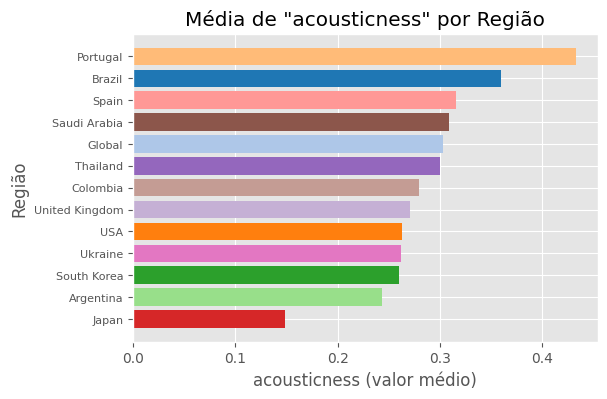

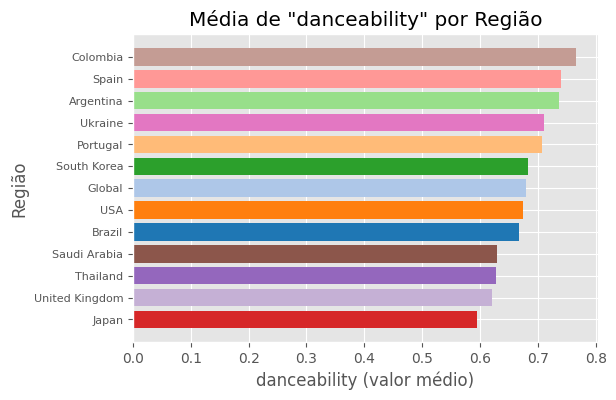

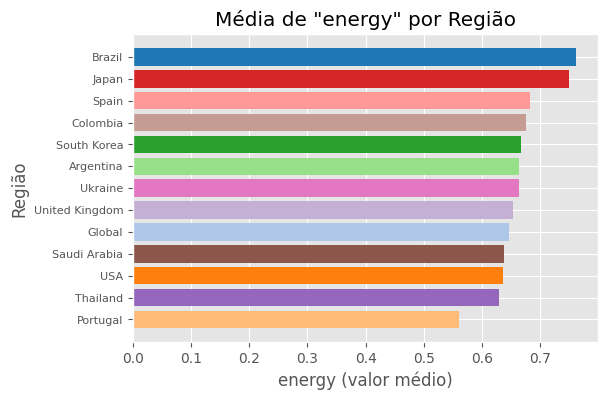

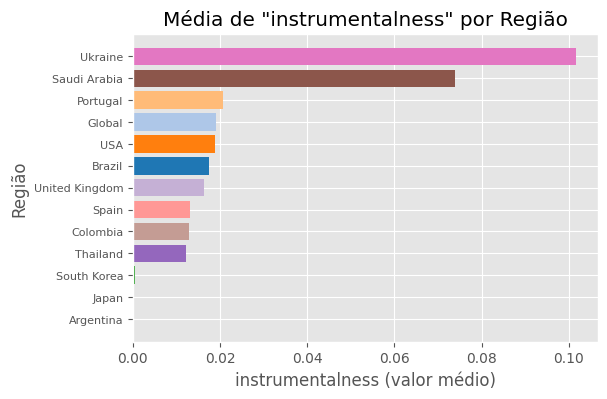

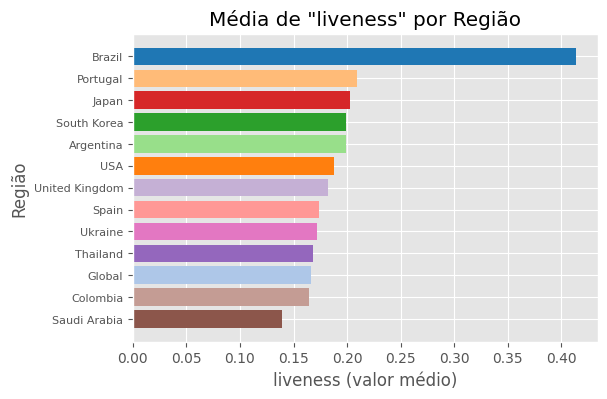

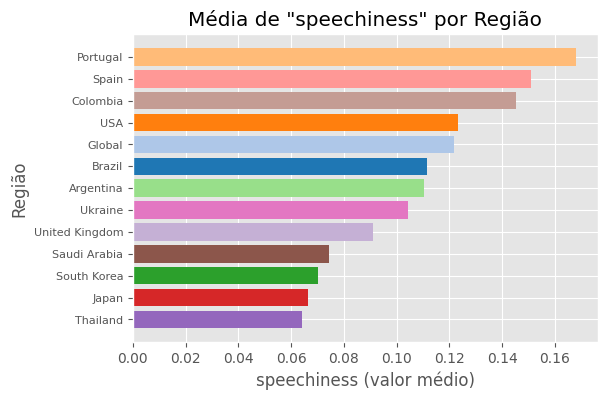

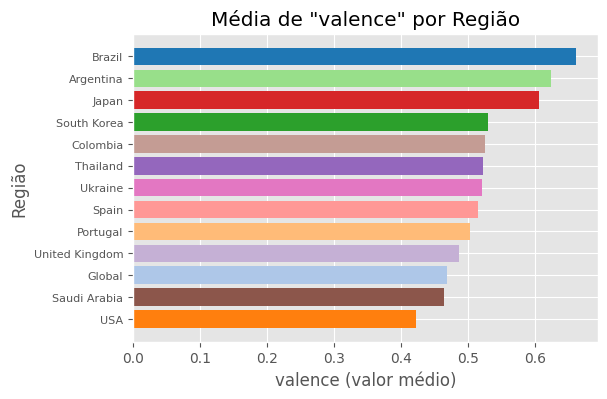

In [ ]:
# Lista das colunas numéricas
colunas_numericas = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

# Cores para cada categoria baseadas na paleta 'tab20b'
cores = plt.cm.tab20.colors[:len(df_selecionado['region'].unique())]

# Mapeamento de cores por categoria
cores_por_categoria = dict(zip(df_selecionado['region'].unique(), cores))

# Iterando sobre as colunas numéricas
for coluna in colunas_numericas:
    # Calcula a média da coluna para cada categoria da coluna 'region'
    media_por_regiao = df_selecionado.groupby('region')[coluna].mean()

    # Ordena as barras pela média
    media_por_regiao = media_por_regiao.sort_values()

    # Número de categorias
    N = len(media_por_regiao)
    # Array com o número de categorias
    ind = np.arange(N)

    # Plotando o gráfico de barras horizontais
    plt.barh(media_por_regiao.index, media_por_regiao.values, color=[cores_por_categoria[c] for c in media_por_regiao.index])
    plt.xlabel(f"{coluna} (valor médio)")
    plt.ylabel('Região')
    plt.title(f'Média de "{coluna}" por Região')
    plt.yticks(ind, fontsize=8)
    # Tamanho da figura
    plt.rcParams['figure.figsize'] = (6, 4)
    # Estilo do gráfico
    plt.style.use("ggplot")
    plt.show()

Por essa análise foi possível observar alguns aspectos interessantes:

As 50 músicas mais tocadas no Brasil (TOP 50 - Brazil) são as com maiores valores para energy (energia, músicas com alta energia costumam ser rápidas, ruidosas e barulhentas), liveness (ao vivo, alta probabilidade de serem músicas gravadas ao vivo), valence (positividade da música,músicas mais alegres).

Em contrapratida, a playlist da Ucrânia aparenta ter mais músicas instrumentais com pouca voz (alto instrumentaness) e menos alegres (baixo valence)

As playlists mais dançantes são as da Colombia, Argentina e Espanha



# Análise dos dados pelos atributos de aúdio versus região

Agora vamos observar a distribuição das músicas de cada playlist em relação a data de lançamento das músicas.

É possível observar que a maioria das playlists apresentam grande quantidade de músicas novas (lançamentos do ultimo ano).
A playlist que possui musicas mais antigas é da do Reino Unido.
A região da Tailandia é que a apresenta um melhor equilibrio em músicas já lançadas nos ultimos anos.

In [ ]:
colunas_selecionadas = ['region','release_date', 'popularity']
df_selecionado = df_top50[colunas_selecionadas]

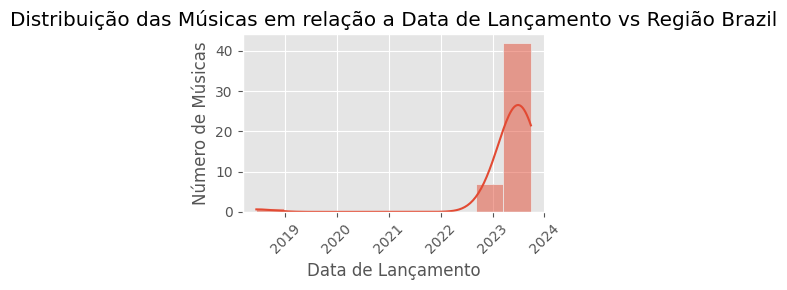

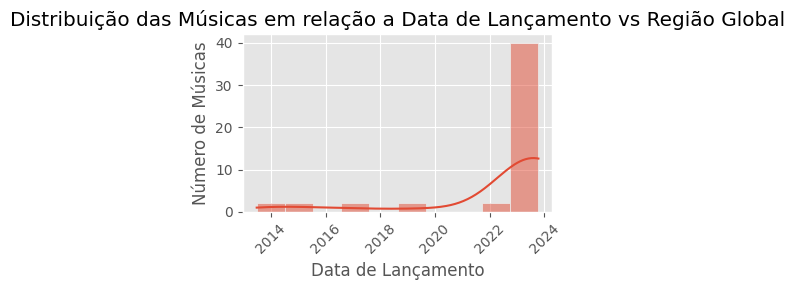

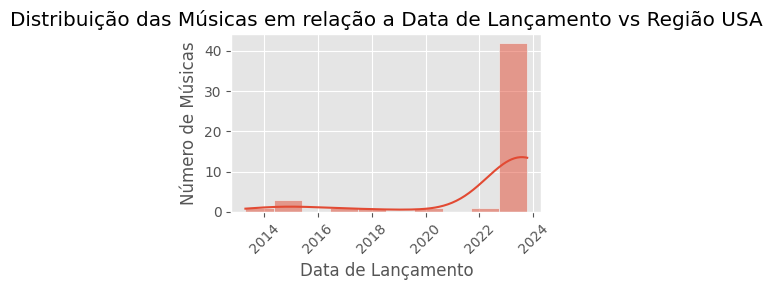

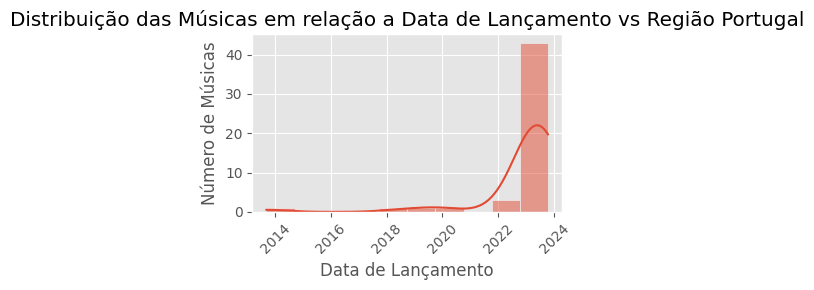

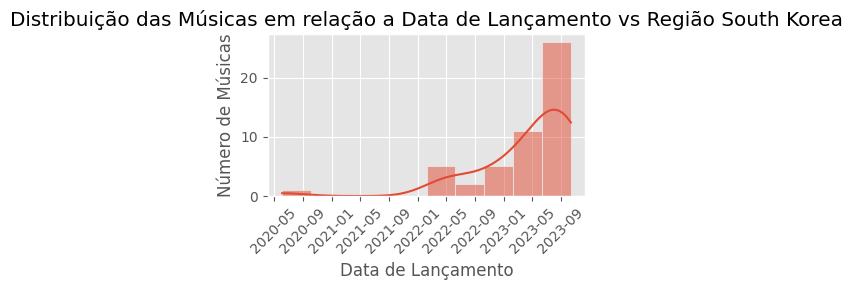

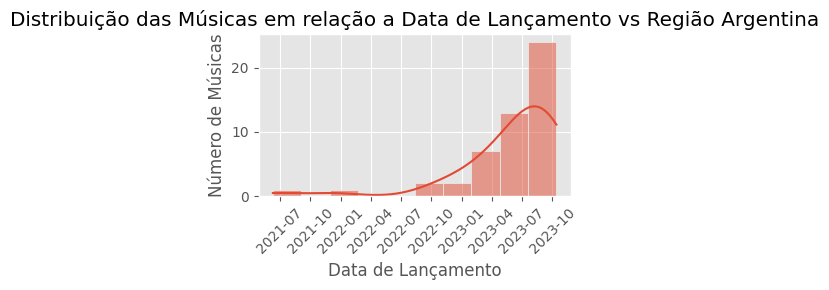

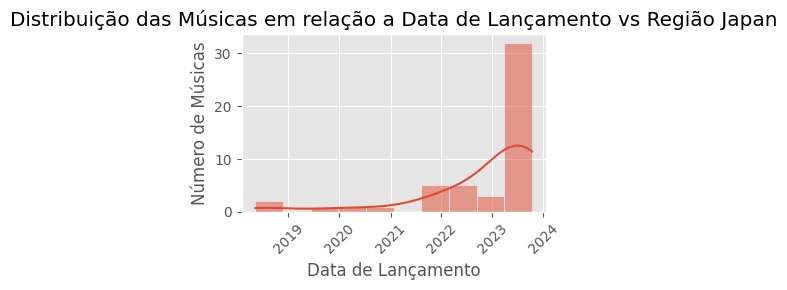

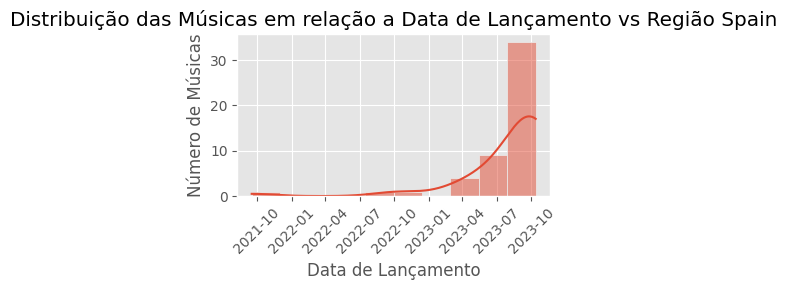

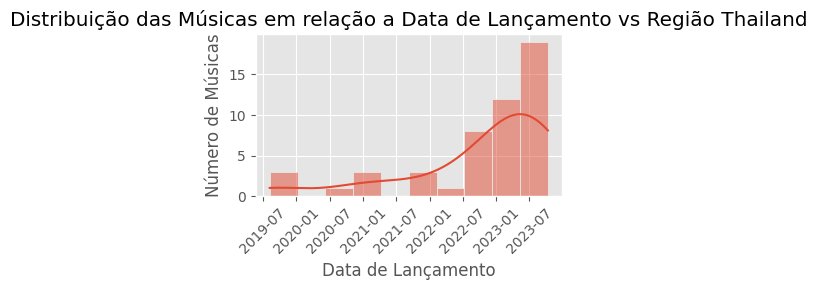

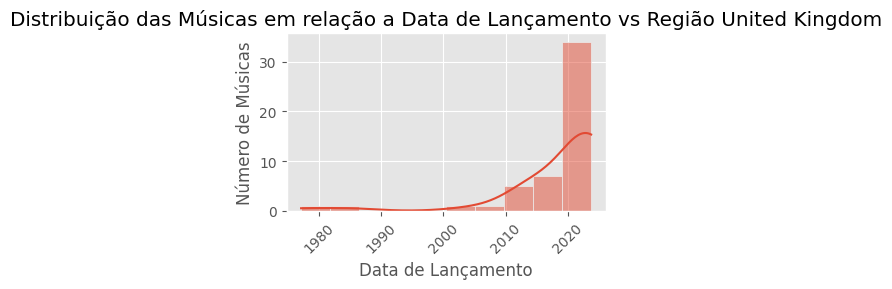

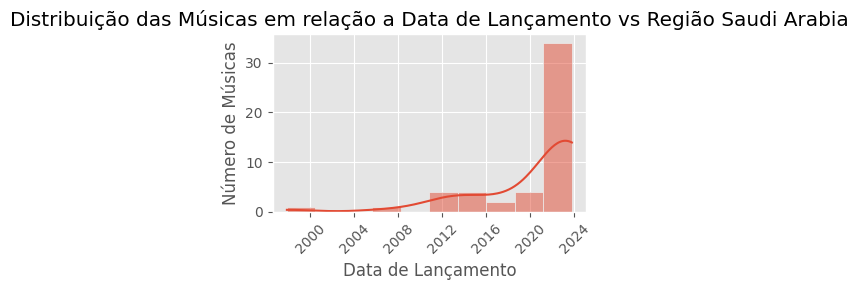

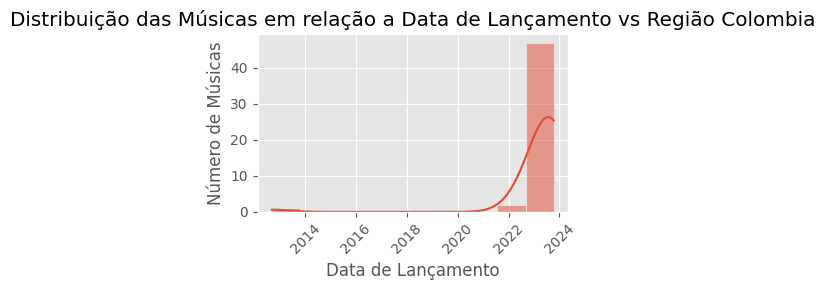

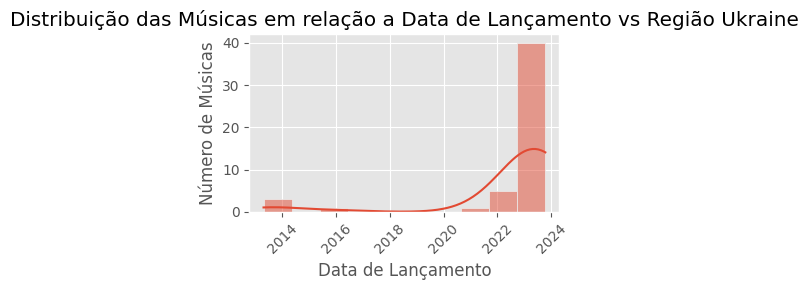

In [ ]:
import seaborn as sns

# Fazer uma cópia do DataFrame
df_date = df_selecionado.copy()

# Convertendo a coluna 'release_date' para datetime
df_date['release_date'] = pd.to_datetime(df_date['release_date'])

# Obter regiões únicas
regioes_unicas = df_date['region'].unique()

# histograma com KDE para cada região
for regiao in regioes_unicas:
    plt.figure(figsize=(4, 3))
    sns.histplot(data=df_date[df_date['region'] == regiao], x='release_date', kde=True, bins=10)
    plt.xlabel('Data de Lançamento')
    plt.ylabel('Número de Músicas')
    plt.title(f'Distribuição das Músicas em relação a Data de Lançamento vs Região {regiao}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Análise dos dados pelos atributos de popularidade versus região
Agora vamos observar a distribuição das popularidades das músicas em relação a cada playlist de região.

É possível observar que as playlists Global, USA, Reino Unido e Brazil são as que mais possuem músicas com alta popularidade. Isso provavelmente se deve ao fato dessas regiões serem regiões que possuem o maior número de usuários no Spotify.

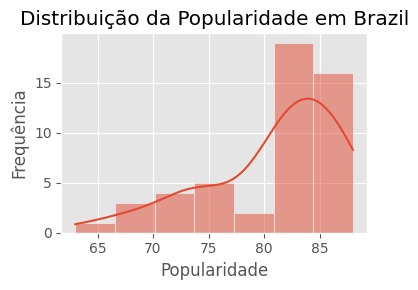

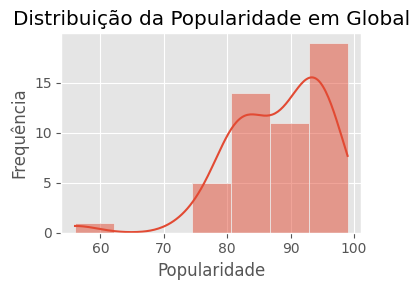

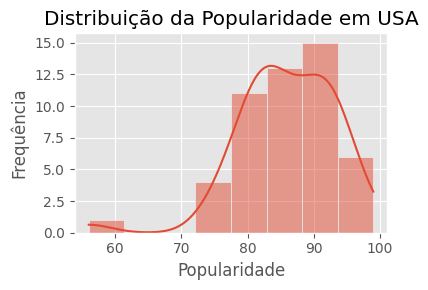

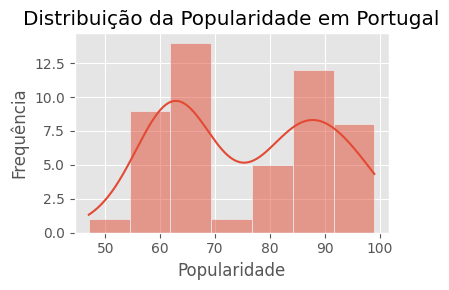

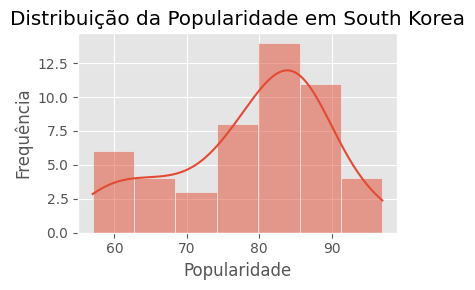

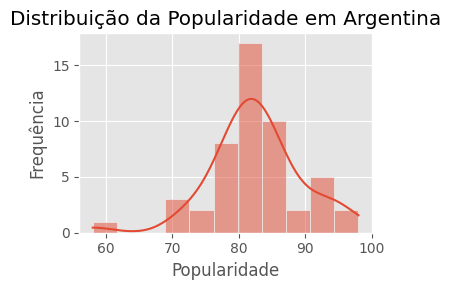

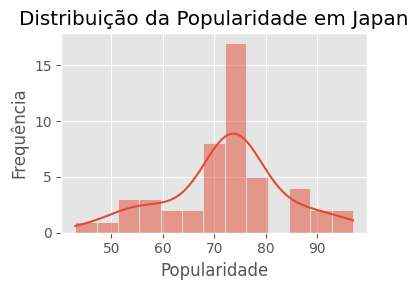

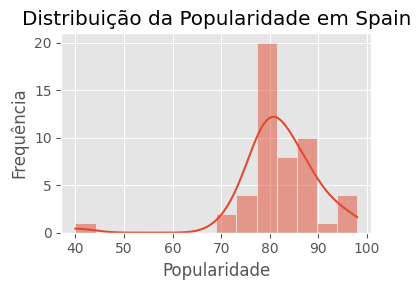

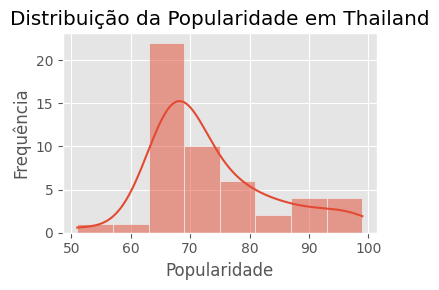

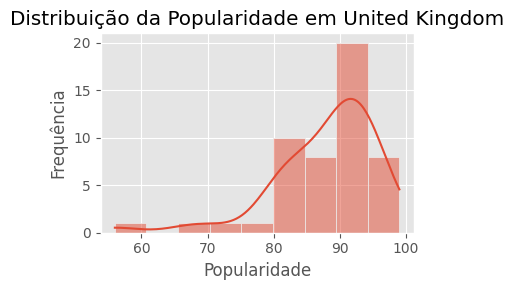

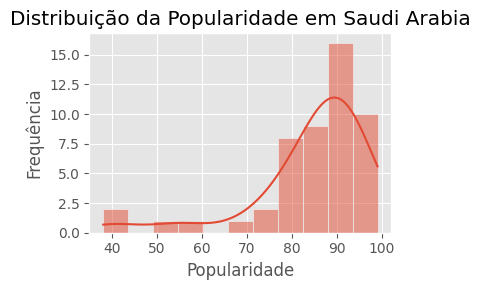

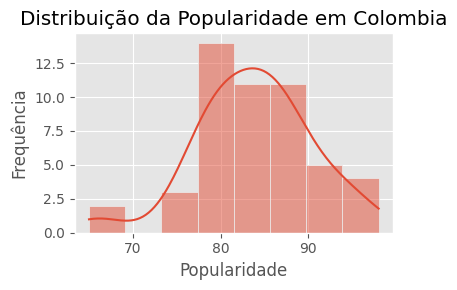

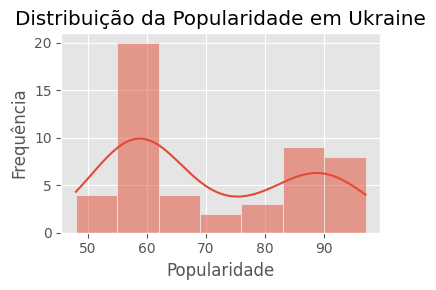

In [ ]:

# Iterando por cada região para criação do grafico de popularidade versus região
for i, regiao in enumerate(df_selecionado['region'].unique()):
    plt.figure(figsize=(4, 3))
    dados_regiao = df_selecionado[df_selecionado['region'] == regiao]
    sns.histplot(dados_regiao['popularity'], kde=True)
    plt.xlabel('Popularidade')
    plt.ylabel('Frequência')
    plt.title(f'Distribuição da Popularidade em {regiao}')
    plt.tight_layout()
    plt.show()








# Outras análises

Lista dos artistas que mais aparecem em todas as playlists


In [ ]:
df_top50['artist'].value_counts().head(10)


Bad Bunny          77
Taylor Swift       21
V                  15
Jung Kook          15
Drake              14
Bizarrap           11
NewJeans           10
Doja Cat           10
KAROL G             9
Lim Young Woong     9
Name: artist, dtype: int64

Lista dos artistas que mais aparecem em cada uma das playlists


In [ ]:
colunas_selecionadas = ['region','artist']
df_selecionado = df_top50[colunas_selecionadas]
contagem_artistas_por_regiao = df_selecionado.groupby(['region', 'artist']).size().reset_index(name='count')

# Exibindo a distribuição de artistas por região
for regiao in contagem_artistas_por_regiao['region'].unique():
    print(f'Distribuição de artistas para a região {regiao}:')
    artistas_regiao = contagem_artistas_por_regiao[contagem_artistas_por_regiao['region'] == regiao]
    artistas_regiao = artistas_regiao.sort_values('count', ascending=False)
    print(artistas_regiao.head(10))  # Exibindo os 10 artistas mais frequentes para cada região
    print('----------------------------------------')

Distribuição de artistas para a região Argentina:
       region         artist  count
5   Argentina       Bizarrap      5
2   Argentina      Bad Bunny      4
4   Argentina        Big One      4
17  Argentina  Ke Personajes      3
0   Argentina     Alan Gomez      2
10  Argentina         Emilia      2
1   Argentina             BM      2
21  Argentina  Maria Becerra      2
23  Argentina         Mesita      2
20  Argentina        Luck Ra      2
----------------------------------------
Distribuição de artistas para a região Brazil:
    region               artist  count
65  Brazil  Zé Neto & Cristiano      4
43  Brazil        Gusttavo Lima      4
50  Brazil         Luan Santana      3
44  Brazil   Henrique & Juliano      3
42  Brazil   Guilherme & Benuto      2
62  Brazil        Simone Mendes      2
33  Brazil          Ana Castela      2
46  Brazil    Israel & Rodolffo      2
49  Brazil         Luan Pereira      2
39  Brazil        Felipe Amorim      2
-------------------------------------

Observa-se que o artista Bad Bunny aparece com muita frequência nas playlists. Fazendo uma análise dos lançamentos mais recentes, podemos observar que recentemente houve um lançamento de um álbum que influenciou o grande aumento de reproduções das músicas desse artista.

In [ ]:
colunas_selecionadas = ['track_name', 'playlist_name', 'artist', 'release_date', 'region']
df_selecionado = df_top50[colunas_selecionadas].copy()  # Fazendo uma cópia do DataFrame

# Convertendo 'release_date' para o tipo datetime na cópia
df_selecionado['release_date'] = pd.to_datetime(df_selecionado['release_date'])

# Ordenando o DataFrame por 'release_date'
df_selecionado = df_selecionado.sort_values(by='release_date', ascending=False)


df_selecionado.head(20)

,track_name,playlist_name,artist,release_date,region
110,PERRO NEGRO,Top 50 - USA,Bad Bunny,2023-10-13,USA
147,GRACIAS POR NADA,Top 50 - USA,Bad Bunny,2023-10-13,USA
63,HIBIKI,Top 50 - Global,Bad Bunny,2023-10-13,Global
596,VUELVE CANDY B,Top 50 - Colombia,Bad Bunny,2023-10-13,Colombia
138,UN PREVIEW,Top 50 - USA,Bad Bunny,2023-10-13,USA
140,WHERE SHE GOES,Top 50 - USA,Bad Bunny,2023-10-13,USA
59,FINA,Top 50 - Global,Bad Bunny,2023-10-13,Global
594,BATICANO,Top 50 - Colombia,Bad Bunny,2023-10-13,Colombia
298,FINA,Top 50 - Argentina,Bad Bunny,2023-10-13,Argentina
588,VOU 787,Top 50 - Colombia,Bad Bunny,2023-10-13,Colombia


Ao realizar uma filtragem pela data '2023-10-13' podemos perceber que nessa data houveram muitos lançamentos.
A seguir seue a lista das musicas lançadas nesse dia e a quantidade de aparições em playlists.

In [ ]:
filtro = df_selecionado[df_selecionado['release_date'] == '2023-10-13']

filtro['track_name'].value_counts()

MONACO                               6
PERRO NEGRO                          5
UN PREVIEW                           5
WHERE SHE GOES                       5
FINA                                 5
GRACIAS POR NADA                     4
HIBIKI                               4
BABY NUEVA                           4
TELEFONO NUEVO                       4
NADIE SABE                           4
SEDA                                 4
MR. OCTOBER                          4
CYBERTRUCK                           4
Chasing That Feeling                 3
MERCEDES CAROTA                      3
VOU 787                              3
NO ME QUIERO CASAR                   2
BATICANO                             2
THUNDER Y LIGHTNING                  2
ACHO PR                              2
VUELVE CANDY B                       2
LOS PITS                             2
One Of Your Girls                    1
OA                                   1
SAY MY GRACE (feat. Travis Scott)    1
NO PIENSO LLAMAR         

# **Conclusão**

A obtenção de dados de playlists do Spotify oferece uma rica fonte de informações para análises de ciência de dados e aplicações de inteligência artificial relacionadas à música e ao comportamento do usuário, porém que não fizeram parte do escopo desse trabalho.

Exemplos:

Análise de Tendências Musicais:
Identificação de padrões de popularidade, gêneros musicais em alta e mudanças nas preferências dos ouvintes ao longo do tempo.

Perfil do Usuário:
Entendimento dos gostos musicais dos usuários com base nas músicas presentes em suas playlists, o que pode ser usado para personalizar recomendações.

Recomendação Personalizada de Músicas: Desenvolvimento de algoritmos de recomendação para sugerir músicas com base nas preferências do usuário e nas características das músicas presentes em suas playlists.

Segmentação de Audiência (Clusterização):Agrupamento de usuários com base em seus padrões de audição, permitindo campanhas de marketing direcionadas.

Análise de Características Musicais: Estudo dos atribuitos de aúdio das músicas (ritmo, valência, energia, etc.) e como elas influenciam a popularidade e a aceitação dos usuários.

Análise Geográfica: Estudo das preferências musicais em diferentes regiões geográficas, o que pode ser útil para planejar turnês de artistas, por exemplo.

Detecção de Tendências musdicais: Identificação precoce de músicas e artistas em ascensão com base no crescimento de sua presença em playlists populares.





